In [1]:
import numpy as np
import pandas as pd
import glob, os
import itertools
import matplotlib.image as mpimg
import cv2
import pickle

import classifier

%matplotlib inline
import matplotlib.pyplot as plt

/home/ubuntu/mynotebooks/yolo/classifier.py
/data1/yolo/detector/lib/classifier.py


In [14]:

import re
vids = [re.search('(T-\d+).mp4', v).group(1) for v in sorted(glob.glob('/data1/yolo/gallery/videos/*.mp4'))]

failure_starts = pd.read_csv('/data1/yolo/gallery/failure_starts.csv', index_col=0, names=['start'])

In [17]:
file_list = sorted(glob.glob('/data1/yolo/gallery/jpgs/*.jpg'))
net_main_1, meta_main_1 = classifier.load_net("/data1/yolo/model/yolov2-voc.cfg", "/data1/yolo/model/weights/backup.2461/yolov2-voc_1664.weights", "/data1/yolo/model/obj.data.1719.strict")
all_detections = [(f, classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25)) for idx, f in enumerate(file_list) if idx % 4 == 0]

def load_detections(vid):
    dets = [{"index": int(d[0][-9:-4]), "detections": d[1], "file": d[0]}  for d in all_detections if "/{}-".format(vid) in d[0]]
    df = pd.DataFrame(dets)
    df['accu_detection'] = df.detections.apply(accu_detection)
    df['rolling_ewm'] = df.accu_detection.ewm(span=20).mean()
    return df.set_index("index")

KeyboardInterrupt: 

In [18]:
def accu_detection(detections):
    return sum([d[1] for d in detections])

In [27]:
def video_fp_fn(vids, failure_starts, v_thresh, plot=False):
    if plot:
        plt.style.use('ggplot')
        fig=plt.figure(figsize=(16, 16*5))

    fp = []
    fn = []

    for j, vid in enumerate(vids):
        det = load_detections(vid)
        failure_start = failure_starts.loc[vid].start
        if plot:
            fig.add_subplot(len(vids)+1, 2, 2*j+1)
            plt.plot(det.accu_detection)
            plt.plot(det.rolling_ewm)
            plt.axvline(x=failure_start, color='b')

            fig.add_subplot(len(vids)+1, 2, 2*j+2)
            plt.text(0.6, 0.5, vid, size=20, ha="center", va="center",)

        detected_failures = det.index[det.rolling_ewm > v_thresh]
        if failure_start > 0:
            if len(detected_failures) == 0:
                fn += [vid]
            elif detected_failures[0] < failure_start:
                fp += [vid]
    return fp, fn

(['T-00206'],
 ['T-00010',
  'T-00011',
  'T-00116',
  'T-00118',
  'T-00124',
  'T-00125',
  'T-00129',
  'T-00203',
  'T-00204'])

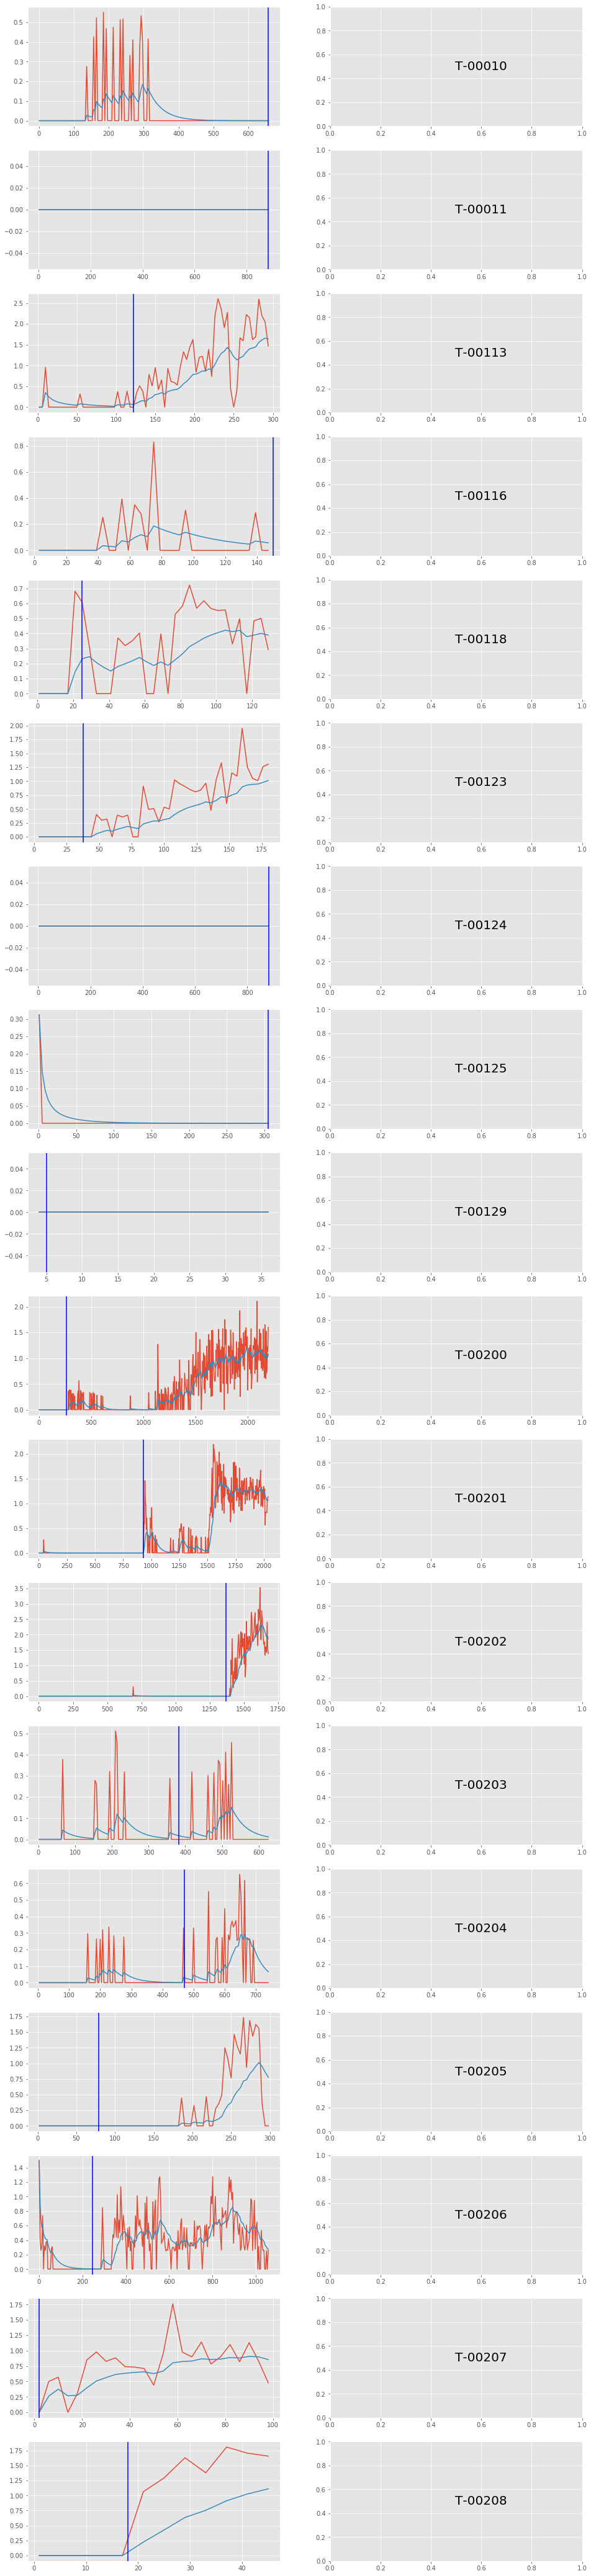

In [28]:
video_fp_fn(vids, failure_starts, 0.45, plot=True)

In [30]:
load_detections('T-00010')

,detections,file,accu_detection,rolling_ewm
index,,,,
1,[],/data1/yolo/gallery/jpgs/T-00010-00001.jpg,0.0,0.000000
5,[],/data1/yolo/gallery/jpgs/T-00010-00005.jpg,0.0,0.000000
9,[],/data1/yolo/gallery/jpgs/T-00010-00009.jpg,0.0,0.000000
13,[],/data1/yolo/gallery/jpgs/T-00010-00013.jpg,0.0,0.000000
17,[],/data1/yolo/gallery/jpgs/T-00010-00017.jpg,0.0,0.000000
21,[],/data1/yolo/gallery/jpgs/T-00010-00021.jpg,0.0,0.000000
25,[],/data1/yolo/gallery/jpgs/T-00010-00025.jpg,0.0,0.000000
29,[],/data1/yolo/gallery/jpgs/T-00010-00029.jpg,0.0,0.000000
33,[],/data1/yolo/gallery/jpgs/T-00010-00033.jpg,0.0,0.000000


In [29]:
failure_starts

,start
T-00010,657
T-00011,882
T-00113,122
T-00116,150
T-00118,25
T-00123,38
T-00124,883
T-00125,305
T-00129,5
T-00200,265
